In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [3]:
rando un poco más. 
df=pd.read_csv("Walmart(1).csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.isnull().sum()/df.count()*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [7]:
#Libreria Sklearn para codificacion de variables
from sklearn.preprocessing import LabelEncoder

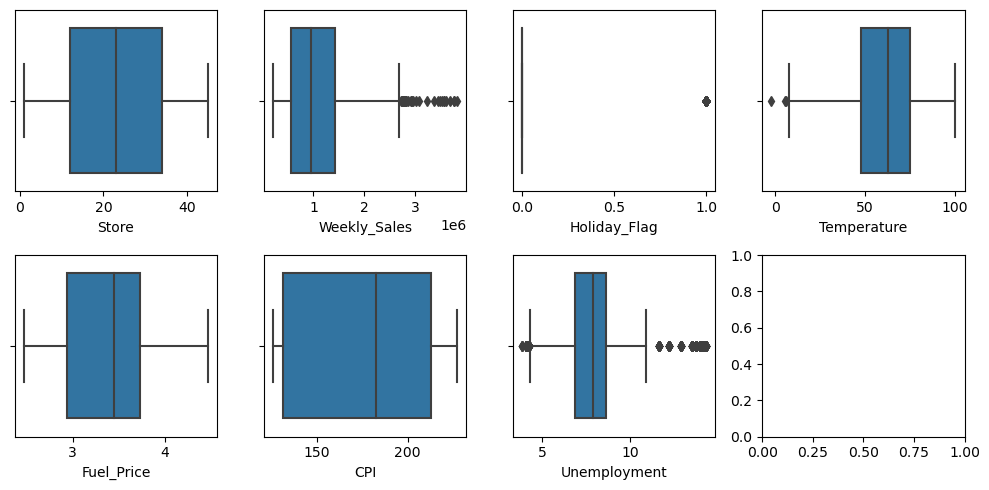

In [8]:
#gráfico boxplot de las variables. 
fig, axs = plt.subplots(2,4, figsize = (10,5))
plt1 = sns.boxplot(df['Store'], ax = axs[0,0])
plt2 = sns.boxplot(df['Weekly_Sales'], ax = axs[0,1])
plt3 = sns.boxplot(df['Holiday_Flag'], ax = axs[0,2])
plt4 = sns.boxplot(df['Temperature'], ax = axs[0,3])
plt1 = sns.boxplot(df['Fuel_Price'], ax = axs[1,0])
plt2 = sns.boxplot(df['CPI'], ax = axs[1,1])
plt3 = sns.boxplot(df['Unemployment'], ax = axs[1,2])

plt.tight_layout()

In [9]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

1.7309999999999999


In [10]:
#Ajustamos la variable
df = df[~((df['Unemployment'] < (Q1 - 1.5 * IQR)) |(df['Unemployment'] > (Q3 + 1.5 * IQR)))]
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5954.000000,5.954000e+03,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000
mean,22.741014,1.050894e+06,0.070205,60.289516,3.339394,174.922598,7.720574
std,13.087596,5.721913e+05,0.255513,18.454730,0.457374,39.027865,1.242527
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,4.308000
25%,11.000000,5.541472e+05,0.000000,46.757500,2.891000,132.761933,6.891000
50%,22.000000,9.513791e+05,0.000000,62.390000,3.417000,189.808591,7.852000
75%,34.000000,1.436133e+06,0.000000,74.660000,3.720000,213.764640,8.494000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,10.926000


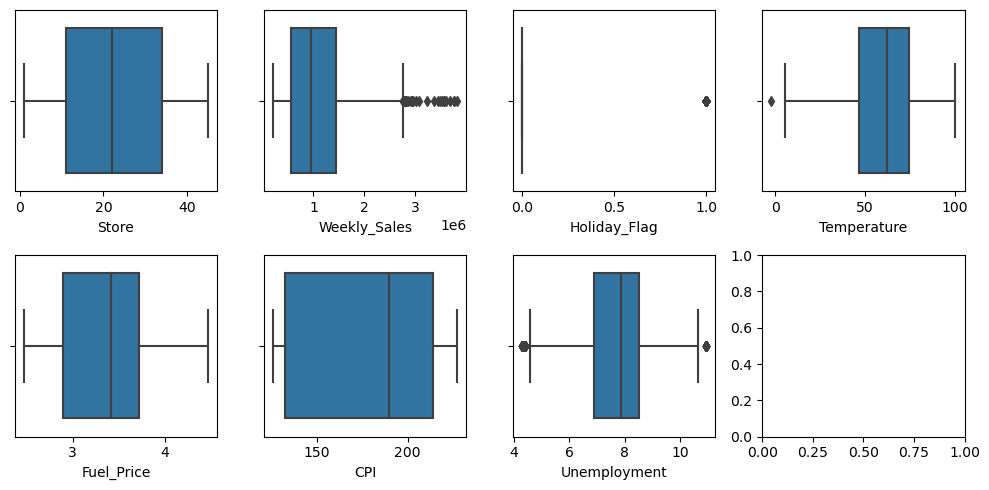

In [11]:
# se vuelven a graficar las cajas para validar como queda nuestro dataset
fig, axs = plt.subplots(2,4, figsize = (10,5))
plt1 = sns.boxplot(df['Store'], ax = axs[0,0])
plt2 = sns.boxplot(df['Weekly_Sales'], ax = axs[0,1])
plt3 = sns.boxplot(df['Holiday_Flag'], ax = axs[0,2])
plt4 = sns.boxplot(df['Temperature'], ax = axs[0,3])
plt1 = sns.boxplot(df['Fuel_Price'], ax = axs[1,0])
plt2 = sns.boxplot(df['CPI'], ax = axs[1,1])
plt3 = sns.boxplot(df['Unemployment'], ax = axs[1,2])

plt.tight_layout()


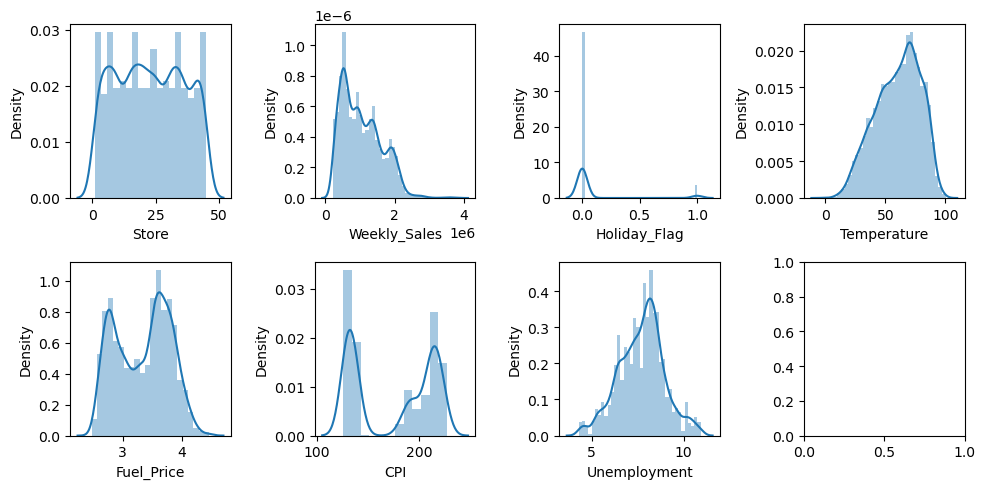

In [12]:
#Graficos de densidad
fig, axs = plt.subplots(2,4, figsize = (10,5))

plt1 = sns.distplot(df['Store'], ax = axs[0,0])
plt2 = sns.distplot(df['Weekly_Sales'], ax = axs[0,1])
plt3 = sns.distplot(df['Holiday_Flag'], ax = axs[0,2])
plt4 = sns.distplot(df['Temperature'], ax = axs[0,3])
plt1 = sns.distplot(df['Fuel_Price'], ax = axs[1,0])
plt2 = sns.distplot(df['CPI'], ax = axs[1,1])
plt3 = sns.distplot(df['Unemployment'], ax = axs[1,2])

plt.tight_layout()



In [13]:
df.corr().style.background_gradient(cmap='coolwarm')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.321986,0.000616,-0.022126,0.049860,-0.205025,0.309472
Weekly_Sales,-0.321986,1.000000,0.036725,-0.061389,0.011257,-0.087443,-0.074999
Holiday_Flag,0.000616,0.036725,1.000000,-0.156881,-0.076853,-0.003215,0.009751
Temperature,-0.022126,-0.061389,-0.156881,1.000000,0.147560,0.218762,0.026236
Fuel_Price,0.049860,0.011257,-0.076853,0.147560,1.000000,-0.142689,-0.104268
CPI,-0.205025,-0.087443,-0.003215,0.218762,-0.142689,1.000000,-0.216206
Unemployment,0.309472,-0.074999,0.009751,0.026236,-0.104268,-0.216206,1.000000


In [14]:
df = df[df.columns.difference(['Date'])]
df

,CPI,Fuel_Price,Holiday_Flag,Store,Temperature,Unemployment,Weekly_Sales
0,211.096358,2.572,0,1,42.31,8.106,1643690.90
1,211.242170,2.548,1,1,38.51,8.106,1641957.44
2,211.289143,2.514,0,1,39.93,8.106,1611968.17
3,211.319643,2.561,0,1,46.63,8.106,1409727.59
4,211.350143,2.625,0,1,46.50,8.106,1554806.68
...,...,...,...,...,...,...,...
6430,192.013558,3.997,0,45,64.88,8.684,713173.95
6431,192.170412,3.985,0,45,64.89,8.667,733455.07
6432,192.327265,4.000,0,45,54.47,8.667,734464.36
6433,192.330854,3.969,0,45,56.47,8.667,718125.53


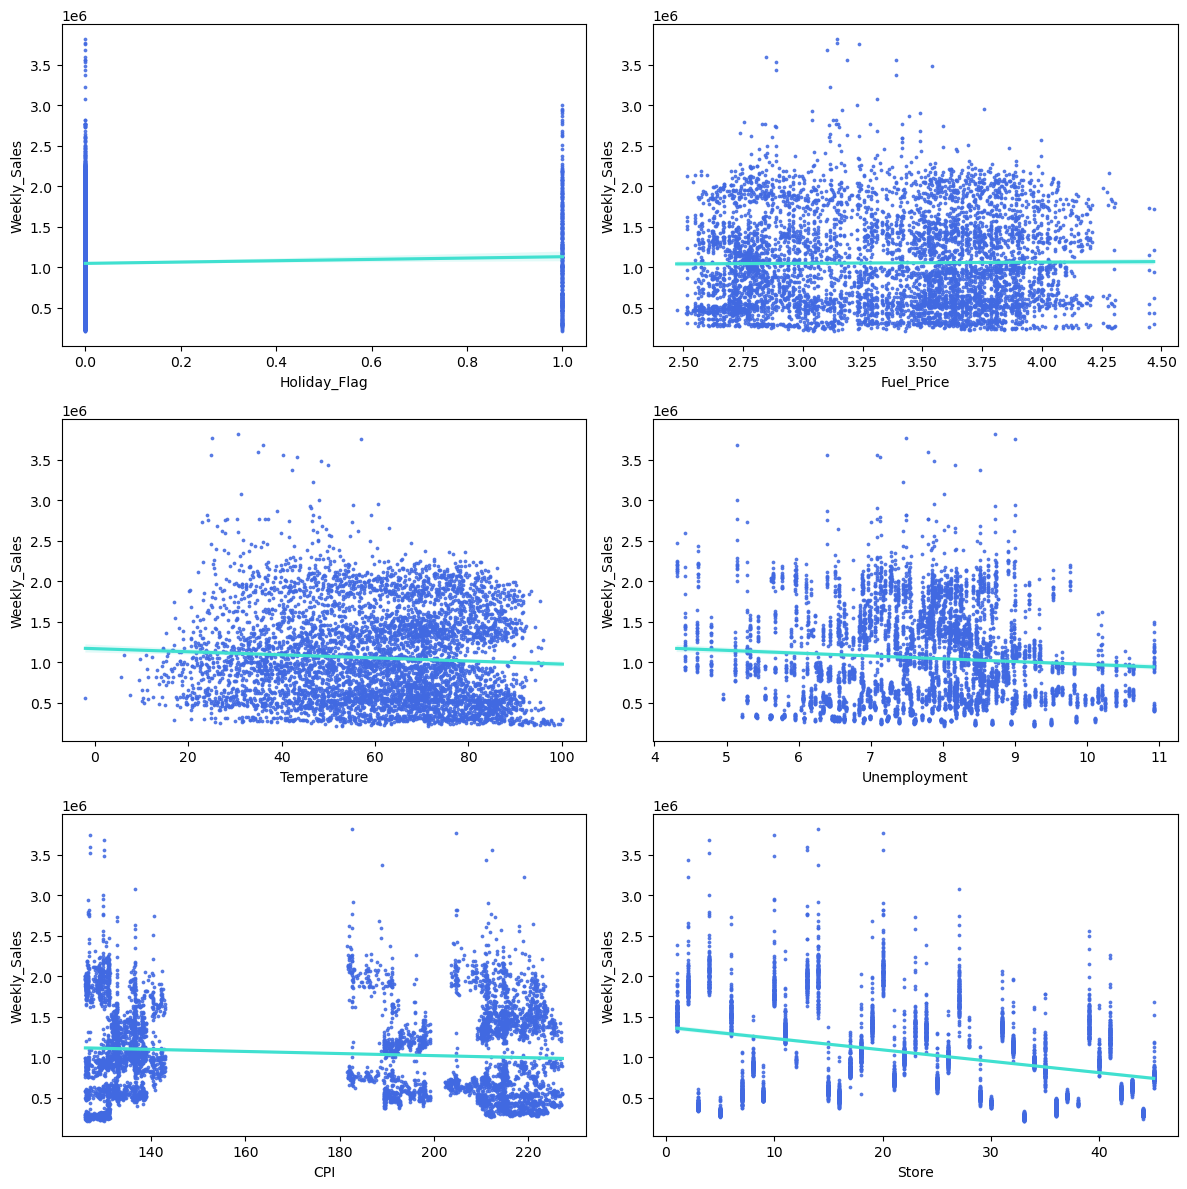

In [18]:
n = 7
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(7, "Weekly_Sales")["Weekly_Sales"].index
# Calculate correlation
for i in np.arange(1,7):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['Weekly_Sales'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

In [15]:
log_weekly_sales=np.log(df.Weekly_Sales)
df['Weekly_Sales']=log_weekly_sales

In [16]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [17]:
regresion = ols("log_weekly_sales ~ CPI + Fuel_Price + Holiday_Flag + Store + Temperature + Unemployment", data=df)
results = regresion.fit()

In [18]:
#Retiramos fuel_ price de nuestro modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       log_weekly_sales   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     115.5
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.39e-138
Time:                        11:30:13   Log-Likelihood:                -4996.5
No. Observations:                5954   AIC:                         1.001e+04
Df Residuals:                    5947   BIC:                         1.005e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.2432      0.092    155.201   

In [19]:
regresion2 = ols("log_weekly_sales ~ CPI + Holiday_Flag + Store + Unemployment", data=df)
results2 = regresion2.fit()

In [20]:
print(results2.summary())
#todas variables representativas.

                            OLS Regression Results                            
Dep. Variable:       log_weekly_sales   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.85e-133
Time:                        11:30:19   Log-Likelihood:                -5013.4
No. Observations:                5954   AIC:                         1.004e+04
Df Residuals:                    5949   BIC:                         1.007e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.3215      0.063    225.962   

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
df2=df[df.columns.difference(['Weekly_Sales', 'log_weekly_sales'])]
df2

,CPI,Fuel_Price,Holiday_Flag,Store,Temperature,Unemployment
0,211.096358,2.572,0,1,42.31,8.106
1,211.242170,2.548,1,1,38.51,8.106
2,211.289143,2.514,0,1,39.93,8.106
3,211.319643,2.561,0,1,46.63,8.106
4,211.350143,2.625,0,1,46.50,8.106
...,...,...,...,...,...,...
6430,192.013558,3.997,0,45,64.88,8.684
6431,192.170412,3.985,0,45,64.89,8.667
6432,192.327265,4.000,0,45,54.47,8.667
6433,192.330854,3.969,0,45,56.47,8.667


In [23]:
df2.dtypes

CPI             float64
Fuel_Price      float64
Holiday_Flag      int64
Store             int64
Temperature     float64
Unemployment    float64
dtype: object

In [24]:
#Dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Fuel_Price', 'Temperature', "Unemployment"])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Fuel_Price','Temperature', "Unemployment"])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['Fuel_Price','Temperature', "Unemployment"])].columns))]

print(vif_data)
  

        feature       VIF
0           CPI  3.158495
1  Holiday_Flag  1.072363
2         Store  3.112969


In [25]:
regresion3 = ols("log_weekly_sales ~ CPI + Holiday_Flag + Store", data=df)
results3 = regresion3.fit()

In [26]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:       log_weekly_sales   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          1.04e-133
Time:                        11:30:34   Log-Likelihood:                -5015.2
No. Observations:                5954   AIC:                         1.004e+04
Df Residuals:                    5950   BIC:                         1.007e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.4158      0.039    370.479   

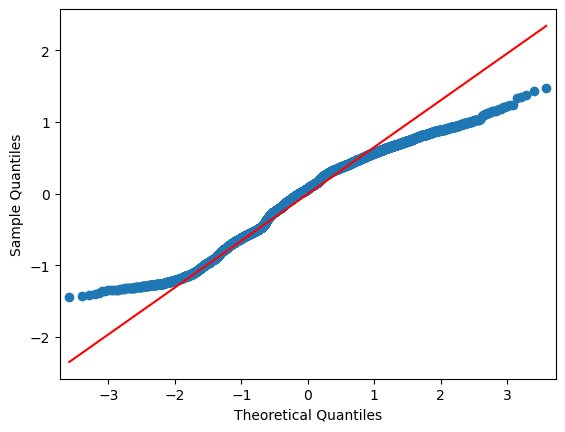

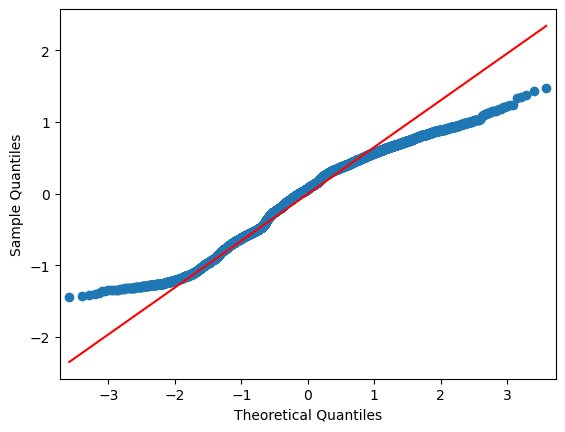

In [27]:
sm.qqplot(results3.resid, line='q')

In [28]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [29]:
#jarque bera
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results3.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 274.7338450849249),
 ('Chi^2 two-tail prob.', 2.199396571766223e-60),
 ('Skew', -0.4279460371413227),
 ('Kurtosis', 2.3877301242201225)]

In [30]:
#los residuos. Tiende a cero. 
results3.resid.mean()

1.673725540650891e-14

In [31]:
y_pred=results3.predict()

Text(0.5, 1.0, 'Gráfica de residuos')

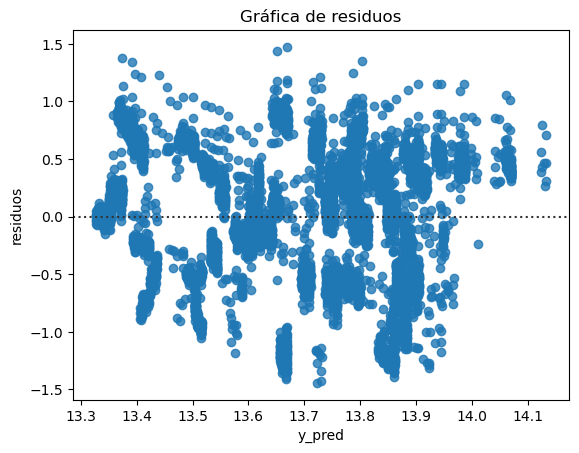

In [32]:
sns.residplot(y_pred, results3.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

In [33]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results3.resid, results.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 224.20374782216115),
 ('p-value', 1.3204388809431272e-45),
 ('f-value', 38.7838016576245),
 ('f p-value', 1.7292835166838133e-46)]

In [34]:
df3=df2[df2.columns.difference(['Fuel_Price', 'Temperature', 'Unemployment', 'Weekly_Sales', 'log_Weekly_Sales'])]
# df3['intercepto']=1
df3=df3[[ 'CPI', 'Holiday_Flag', 'Store']]
df3

,CPI,Holiday_Flag,Store
0,211.096358,0,1
1,211.242170,1,1
2,211.289143,0,1
3,211.319643,0,1
4,211.350143,0,1
...,...,...,...
6430,192.013558,0,45
6431,192.170412,0,45
6432,192.327265,0,45
6433,192.330854,0,45


In [35]:
#predicciones
results3.predict()

array([13.91735076, 13.97984519, 13.91690826, ..., 13.35016713,
       13.35015889, 13.35020928])

In [36]:
y_pred=results3.predict(df3)
y_pred

0       13.917351
1       13.979845
2       13.916908
3       13.916838
4       13.916768
          ...    
6430    13.350887
6431    13.350527
6432    13.350167
6433    13.350159
6434    13.350209
Length: 5954, dtype: float64

In [38]:
log_weekly_sales

0       14.312455
1       14.311400
2       14.292966
3       14.158907
4       14.256862
          ...    
6430    13.477481
6431    13.505522
6432    13.506897
6433    13.484400
6434    13.541444
Name: Weekly_Sales, Length: 5954, dtype: float64

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

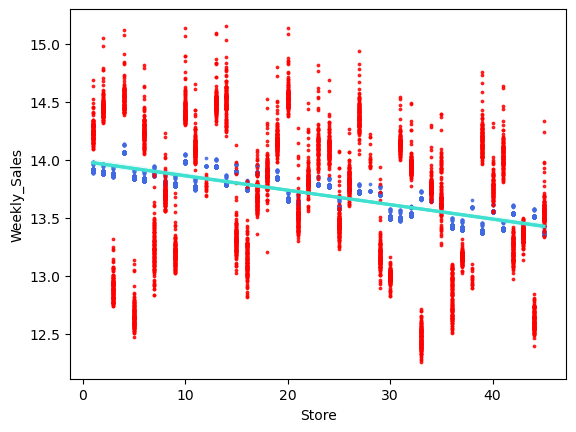

In [39]:
sns.regplot(x=df["Store"], y=y_pred, scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
#se valida un gráfico de dispersión para los valores observados en color rojo
sns.regplot(x=df["Store"], y=df['Weekly_Sales'], scatter_kws={"color": "red", "s": 3},
                line_kws={"color": "turquoise"})